# Code for Producing Figure 2  

### From the paper:  
**"Fractal clusters and urban scaling shape spatial inequality in U.S. patenting"**, published in npj Complexity,  https://doi.org/10.1038/s44260-025-00054-y

**Authors:**  
Salva Duran-Nebreda, Blai Vidiella,  R. Alexander Bentley and Sergi Valverde

**Date:** September 8, 2025  
**Location:** Barcelona  
**Group:** Evolution of Networks Lab |  https://svalver.github.io  
**E-mail:** svalver@gmail.com

Before executing this code, please ensure that null model predictions were created with the following commands:

    python Omega_Reinforcement.py
    python Omega_Models.py 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

ln_space = np.logspace(0,5, base=10, num=200)

def bin(val_):
    global ln_space

    value = val_
    for item in ln_space:
        if item > val_:
            value = item
            break

    return value


import numpy as np
from collections import defaultdict
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None


def calculate_sliding_likelihoods(coordinate_sequence, bin_size=200, step_size=25):
    """
    Calculate the likelihood of observing a location in a given sliding window (bin)
    based on how often it has appeared before that window.

    Args:
    - coordinate_sequence: List of coordinates (locations).
    - bin_size: Size of each sliding window (default is 50).
    - step_size: The number of units to move the window forward each time (default is 10).

    Returns:
    - sliding_likelihoods: A list of dictionaries, where each dictionary represents
      the likelihood for each sliding window with respect to different frequency classes.
    """

    # Step 1: Organize coordinates into sliding windows
    sliding_likelihoods = []  # To store likelihoods for each sliding window
    num_steps = (len(coordinate_sequence) - bin_size) // step_size + 1

    for step in range(num_steps):
        start_index = step * step_size
        end_index = start_index + bin_size
        current_window = coordinate_sequence[start_index:end_index]

        if len(current_window) < bin_size:
            break  # Stop if the window is incomplete (this handles edge cases)

        # Initialize variables to track frequency and likelihood
        location_frequencies = defaultdict(int)  # To count how many times each location appeared before this window

        # Calculate prior frequencies up to the start of the current window
        prior_sequence = coordinate_sequence[:start_index]
        for loc in prior_sequence:
            location_frequencies[loc] += 1

        # Calculate prior class counts (same structure as in the original code)
        frequency_prior_counts = defaultdict(int)
        frequency_prior_counts[0] = 0
        frequency_prior_counts[1] = 0
        frequency_prior_counts[2] = 0
        frequency_prior_counts[4] = 0
        frequency_prior_counts[8] = 0
        frequency_prior_counts[16] = 0
        frequency_prior_counts[32] = 0
        frequency_prior_counts[64] = 0
        frequency_prior_counts[128] = 0
        frequency_prior_counts[256] = 0
        frequency_prior_counts[512] = 0
        frequency_prior_counts[1024] = 0

        for loc_freq in location_frequencies.values():
            if loc_freq == 1:
                frequency_prior_counts[1] += 1
            elif loc_freq == 2:
                frequency_prior_counts[2] += 1
            elif 3 <= loc_freq <= 4:
                frequency_prior_counts[4] += 1
            elif 5 <= loc_freq <= 8:
                frequency_prior_counts[8] += 1
            elif 9 <= loc_freq <= 16:
                frequency_prior_counts[16] += 1
            elif 17 <= loc_freq <= 32:
                frequency_prior_counts[32] += 1
            elif 33 <= loc_freq <= 64:
                frequency_prior_counts[64] += 1
            elif 65 <= loc_freq <= 128:
                frequency_prior_counts[128] += 1
            elif 129 <= loc_freq <= 256:
                frequency_prior_counts[256] += 1
            elif 257 <= loc_freq <= 512:
                frequency_prior_counts[512] += 1
            else:
                frequency_prior_counts[1024] += 1

        # Initialize the frequency class counts for the current window
        frequency_class_counts = defaultdict(int)
        frequency_class_counts[0] = 0
        frequency_class_counts[1] = 0
        frequency_class_counts[2] = 0
        frequency_class_counts[4] = 0
        frequency_class_counts[8] = 0
        frequency_class_counts[16] = 0
        frequency_class_counts[32] = 0
        frequency_class_counts[64] = 0
        frequency_class_counts[128] = 0
        frequency_class_counts[256] = 0
        frequency_class_counts[512] = 0
        frequency_class_counts[1024] = 0

        # Count how many times each location appeared before this window
        for loc in current_window:
            prev_count = location_frequencies[loc]

            # Classify the location based on its previous count using powers of 2
            if prev_count == 1:
                frequency_class_counts[1] += 1
            elif prev_count == 2:
                frequency_class_counts[2] += 1
            elif 3 <= prev_count <= 4:
                frequency_class_counts[4] += 1
            elif 5 <= prev_count <= 8:
                frequency_class_counts[8] += 1
            elif 9 <= prev_count <= 16:
                frequency_class_counts[16] += 1
            elif 17 <= prev_count <= 32:
                frequency_class_counts[32] += 1
            elif 33 <= prev_count <= 64:
                frequency_class_counts[64] += 1
            elif 65 <= prev_count <= 128:
                frequency_class_counts[128] += 1
            elif 129 <= prev_count <= 256:
                frequency_class_counts[256] += 1
            elif 257 <= prev_count <= 512:
                frequency_class_counts[512] += 1
            elif prev_count > 512:
                frequency_class_counts[1024] += 1
            else:
                frequency_class_counts[0] += 1

        # Step 4: Calculate likelihoods based on the frequency classes
        likelihoods = {}
        for frequency_class, count in frequency_class_counts.items():
            likelihoods[frequency_class] = count / ((frequency_prior_counts[frequency_class] + 1) * bin_size)

        # Store the likelihoods for this sliding window
        sliding_likelihoods.append(likelihoods)

    return sliding_likelihoods

In [2]:
DATAFOLDER = "../../data/"

biotech 34910


/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_28969/2884043727.py:107: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.059560179277616' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'N'] = bin(df.loc[i,'N'])
/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_28969/2884043727.py:109: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='N', y='Omega', ci='sd', hue='Dataset', style='Dataset', palette=[colors[2],(0.2,0.2,0.2),(0.15,0.15,0.15)], ax=ax2, legend=False)
/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_28969/2884043727.py:117: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df, x='N', y='D', ci='sd', hue='Dataset', style='Dataset', palette=[colors[2],(0.2,0.2,0.2),(0.15,0.15,0.15)], ax

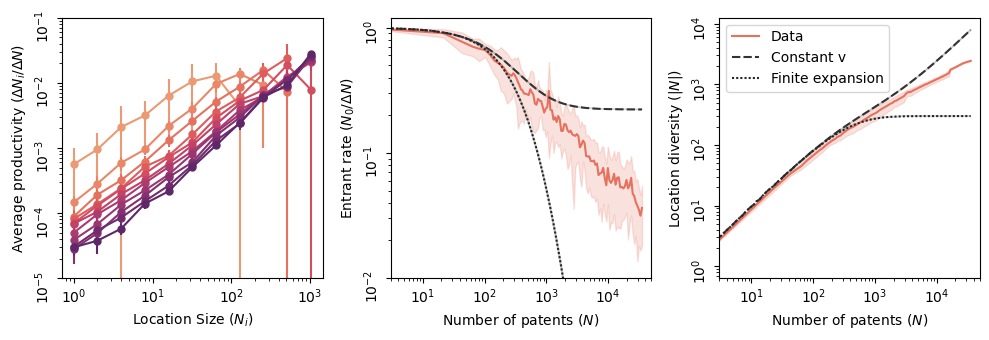

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3.5))

grouped_likelihoods = []
# Example usage:
data_P = pd.DataFrame(columns=['Dataset', 'N', 'Rate', 'FS'])
for dataset in ['biotech']:#'smartphone','chips', 'plugin2', 'fracking', 'videogames', 'ml', 'apps2',
    #Aggregate Data
    df = pd.read_csv(DATAFOLDER + 'full_' + dataset + '.csv', encoding="latin-1")
    #print(dataset, len(df))

    #Drop useless columns
    df = df.drop(['patent_id', 'filing_date', 'cpc','type', 'title', 'assignee', 'person', 'first',
             'second', 'inventors', 'loc', 'cites', 'birth', 'death'], axis=1)
    df.reset_index(inplace=True)

    #Normalize naming
    for i in range(len(df)):
        if df.loc[i, 'country'] == 'USA':
            df.loc[i, 'country'] = 'US'

    #Drop non US data
    df_country = df[df['country'] == 'US']
    df_country.reset_index(drop=True, inplace=True)
    df_country.loc[:,'city'] = ''

    #Reformat location and date
    for i in range(len(df_country)):
        df_country.loc[i, 'city'] = str(df_country.loc[i, 'longitude']) + ', ' + str(df_country.loc[i, 'latitude'])
        df_country.loc[i, 'date'] = datetime.strptime(df_country.loc[i, 'date'], '%Y-%m-%d')

    #print(df_country.head())

    #Sort Values
    df_c = df_country.sort_values(by=['date'])
    df_c.reset_index(inplace=True)
    #dates = list(df_c['date'])
    #print(dates)

    #Obtain sequence of empirical patents
    sequence = list(df_c.loc[:, 'city'])
    Length = len(sequence)

    patents = len(sequence)
    print(dataset, patents)

    bin_size=300
    step_size = 25
    style = 'logarithmic'
    #num_bins = (len(sequence) - bin_size) // step_size + 1
    bin_likelihoods = calculate_sliding_likelihoods(sequence, bin_size=bin_size, step_size=step_size)
    classes = [0,1,2,4,8,16,32,64,128,256,512,1024]
    group_size = int(len(bin_likelihoods)/10)

    num_bins = len(bin_likelihoods)
    colors = sns.color_palette('flare', 1 + num_bins // group_size)

    # Group the sliding windows based on the group size
    for i in range(0, num_bins, group_size):
        group = bin_likelihoods[i:i + group_size]

        # Initialize a dictionary to store grouped likelihoods
        aggregated_group = defaultdict(list)

        for likelihood in group:
            likelihood.pop(0, None)  # Remove frequency class 0 if present
            for freq_class, value in likelihood.items():
                aggregated_group[freq_class].append(value)

        # For each frequency class, calculate mean and standard deviation
        group_stats = {}
        for freq_class, values in aggregated_group.items():
            '''if freq_class > 0:
                values = [vi / freq_class for vi in values]'''
            mean_val = np.mean(values)
            std_dev_val = np.std(values)
            if mean_val != 0:  # Only keep non-zero mean likelihoods
                group_stats[freq_class] = (mean_val, std_dev_val)

        grouped_likelihoods.append(group_stats)

    # Plotting
    for idx, group_stats in enumerate(grouped_likelihoods):
        sorted_list = sorted(group_stats.items())
        sorted_dict = {}
        for key, (mean, std_dev) in sorted_list:
            sorted_dict[key] = (mean, std_dev)

        x = list(sorted_dict.keys())
        y = [v[0] for v in sorted_dict.values()]  # Mean values
        y_err = [v[1] for v in sorted_dict.values()]  # Standard deviations

        #plt.errorbar(x, y, yerr=y_err, label=f'Group {idx + 1}', fmt='-o', color=colors[idx])
        ax1.errorbar(x, y, yerr=y_err, fmt='-o', markersize=5, color=colors[idx])

    # Configure plot aesthetics
    ax1.loglog()
    ax1.set_ylim([0.00001,0.1])
    ax1.set_xlabel('Location Size ($N_i$)')
    ax1.set_ylabel('Average productivity ($\\Delta N_i/ \\Delta N$)')

df = pd.read_csv('Omega_D_lin.csv')
df['Dataset'] = 'Data'
df_ = pd.read_csv('Omega_models.csv')
df = pd.concat((df, df_))
df.reset_index(inplace=True)
for i in range(len(df)):
    df.loc[i,'N'] = bin(df.loc[i,'N'])

sns.lineplot(data=df, x='N', y='Omega', ci='sd', hue='Dataset', style='Dataset', palette=[colors[2],(0.2,0.2,0.2),(0.15,0.15,0.15)], ax=ax2, legend=False)
#plt.legend()
ax2.loglog()
ax2.set_ylim([0.01,1.2])
ax2.set_xlim([3, 50000])
ax2.set_xlabel('Number of patents ($N$)')
ax2.set_ylabel('Entrant rate ($ N_0/ \\Delta N$)')

sns.lineplot(data=df, x='N', y='D', ci='sd', hue='Dataset', style='Dataset', palette=[colors[2],(0.2,0.2,0.2),(0.15,0.15,0.15)], ax=ax3)
plt.legend()
ax3.loglog()
ax3.set_xlabel('Number of patents ($N$)')
ax3.set_ylabel('Location diversity ($|N|$)')
ax3.set_xlim([3, 50000])


for tick in ax1.get_yticklabels():
    tick.set_rotation(90)

for tick in ax2.get_yticklabels():
    tick.set_rotation(90)

for tick in ax3.get_yticklabels():
    tick.set_rotation(90)

plt.tight_layout()
plt.savefig('Fig2.pdf')
plt.show()
plt.close()